In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
loan_data_dict = pd.read_excel("Data_Dictionary.xlsx")
loan_data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [3]:
loan = pd.read_csv("loan.csv")
#loan.head(20)

C:\Users\d291354\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,661.00",0.00,"39,717.00",0.00,0.00,0.00,"39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,661.00","39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,

In [5]:
loan.shape

(39717, 111)

In [6]:
column_name = list(loan.columns)
column_name

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [7]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
loan.isnull().sum().value_counts()
## Total 54 columns are having NULL Values as all the records 39717 are NULL

39717    54
0        43
56        2
25682     1
71        1
36931     1
697       1
1075      1
50        1
38577     1
39        1
2459      1
12940     1
11        1
2         1
dtype: int64

In [9]:
percent_missing = loan.isnull().sum() * 100 / len(loan)
loan_na_df = pd.DataFrame({'column_name': loan.columns,
                                 'percent_missing': percent_missing.round(2)})
loan_na_df.sort_values('percent_missing', inplace=True)

In [10]:
# List of columns having NULL values
loan_na_columns = loan_na_df[(loan_na_df['percent_missing'] == 100.00)].column_name.tolist()

In [11]:
# Dropping columns having all missing values
loan_columns_dropped_data = loan.drop(loan_na_columns, axis=1)

In [12]:
loan_columns_dropped_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,nan,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,"110,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,nan,1,INDIVIDUAL,0,nan,0,nan,nan
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,"18,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.

### Analyse some of the Columns

In [13]:
loan_columns_dropped_data['id'].unique().shape
## All Id are unique

(39717,)

In [14]:
loan_columns_dropped_data['member_id'].unique().shape
## All Member Id are unique

(39717,)

In [15]:
loan_columns_dropped_data['next_pymnt_d'].unique()
## only 3 unique values are present, also it shall not contribute in prediction as this is next scheduled payment date which 
## will not help in identifying if the person will default

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [16]:
#loan_columns_dropped_data['mths_since_last_record'].unique()

In [17]:
#loan_columns_dropped_data['mths_since_last_delinq'].unique()

In [18]:
#loan_columns_dropped_data = loan_columns_dropped_data.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d',
#                                                           'mths_since_last_record', 'mths_since_last_delinq'], axis=1)
loan_columns_dropped_data = loan_columns_dropped_data.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d'], axis=1)

In [19]:
loan_columns_dropped_data['tax_liens'].unique()
## This column can be dropped as 

array([ 0., nan])

In [20]:

loan_columns_dropped_data['collections_12_mths_ex_med'].unique()

array([ 0., nan])

### UNIQUE COLUMNS DATASET

In [21]:
##Find count of Unique Values of columns 
unique_columns = loan_columns_dropped_data.columns.unique()
unique_val = pd.concat([pd.DataFrame(
    [[unique_columns[i] ,str(loan_columns_dropped_data[unique_columns[i]].unique()),
       str(len(loan_columns_dropped_data[unique_columns[i]].unique()))]], 
    columns=['COLUMNS','UNIQUE_VAL','UNIQUE_VAL_COUNT']) for i in range(len(unique_columns))],
          ignore_index=True)
unique_val['UNIQUE_VAL_COUNT'] = pd.to_numeric(unique_val['UNIQUE_VAL_COUNT'])
unique_val.sort_values(by ='UNIQUE_VAL_COUNT',inplace=True)
unique_val
## There are columns identfied with only 1 unique values , these are the candidates for dropping from the dataframe as these 
## shall not contribute in prediction

,COLUMNS,UNIQUE_VAL,UNIQUE_VAL_COUNT
49,delinq_amnt,[0],1
47,acc_now_delinq,[0],1
46,application_type,['INDIVIDUAL'],1
31,initial_list_status,['f'],1
45,policy_code,[1],1
15,pymnt_plan,['n'],1
51,tax_liens,[ 0. nan],2
48,chargeoff_within_12_mths,[ 0. nan],2
3,term,[' 36 months' ' 60 months'],2
44,collections_12_mths_ex_med,[ 0. nan],2


In [22]:
## Deleting column having all values as same. So not adding any importance in analysis
loan_columns_dropped_data = loan_columns_dropped_data.drop(['delinq_amnt', 'acc_now_delinq', 'application_type',
                                                           'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med','emp_title'], axis=1)
## dropped emp_title as well

In [23]:
#string_columns

In [24]:
loan_columns_dropped_data.shape
## Only 43 columns are left for analysis now 

(39717, 42)

In [25]:
## RE- run Unique Columns with dropped column dataset
unique_columns = loan_columns_dropped_data.columns.unique()
unique_val = pd.concat([pd.DataFrame(
    [[unique_columns[i] ,str(loan_columns_dropped_data[unique_columns[i]].unique()),
       str(len(loan_columns_dropped_data[unique_columns[i]].unique()))]], 
    columns=['COLUMNS','UNIQUE_VAL','UNIQUE_VAL_COUNT']) for i in range(len(unique_columns))],
          ignore_index=True)
unique_val['UNIQUE_VAL_COUNT'] = pd.to_numeric(unique_val['UNIQUE_VAL_COUNT'])
unique_val.sort_values(by ='UNIQUE_VAL_COUNT',inplace=True)
unique_val

,COLUMNS,UNIQUE_VAL,UNIQUE_VAL_COUNT
3,term,[' 36 months' ' 60 months'],2
13,loan_status,['Fully Paid' 'Charged Off' 'Current'],3
11,verification_status,['Verified' 'Source Verified' 'Not Verified'],3
41,pub_rec_bankruptcies,[ 0. 1. 2. nan],4
25,pub_rec,[0 1 2 3 4],5
9,home_ownership,['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE'],5
6,grade,['B' 'C' 'A' 'E' 'F' 'D' 'G'],7
21,inq_last_6mths,[1 5 2 0 3 4 6 7 8],9
19,delinq_2yrs,[ 0 2 3 1 4 6 5 8 7 9 11],11
8,emp_length,['10+ years' '< 1 year' '1 year' '3 years' '8 ...,12


## Create Derived Columns

In [26]:
loan_columns_dropped_data['term_months'] = loan_columns_dropped_data['term'].str.rstrip('months')
del loan_columns_dropped_data['term']

In [27]:
loan_columns_dropped_data['int_rate_percentage'] = loan_columns_dropped_data['int_rate'].str.rstrip('%')
del loan_columns_dropped_data['int_rate']

In [28]:
loan_columns_dropped_data['emp_length_years'] = loan_columns_dropped_data['emp_length'].str.rstrip('years ')
loan_columns_dropped_data['emp_length_years'].replace({'10+': '10'}, inplace=True)
loan_columns_dropped_data['emp_length_years'][loan_columns_dropped_data['emp_length_years'] == '< 1'] = '0.5'
del loan_columns_dropped_data['emp_length']

C:\Users\d291354\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
loan_columns_dropped_data['revol_util_percentage'] = loan_columns_dropped_data['revol_util'].str.rstrip('%')
del loan_columns_dropped_data['revol_util']

In [30]:
loan_columns_dropped_data['issue_d_month'], loan_columns_dropped_data['issue_d_year'] = loan_columns_dropped_data[
    'issue_d'].str.split('-').str

loan_columns_dropped_data['last_credit_pull_d_month'], loan_columns_dropped_data['last_credit_pull_d_year'] = loan_columns_dropped_data[
    'last_credit_pull_d'].str.split('-').str

loan_columns_dropped_data['last_pymnt_d_month'], loan_columns_dropped_data['last_pymnt_d_year'] = loan_columns_dropped_data[
    'last_pymnt_d'].str.split('-').str

loan_columns_dropped_data['earliest_cr_line_month'], loan_columns_dropped_data['earliest_cr_line_year'] = loan_columns_dropped_data[
    'earliest_cr_line'].str.split('-').str


In [31]:
loan_columns_dropped_data['issue_d_year'] = '20' + loan_columns_dropped_data['issue_d_year']

In [32]:
loan_columns_dropped_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'term_months', 'int_rate_percentage',
       'emp_length_years', 'revol_util_percentage', 'issue_d_month',
       'issue_d_year', 'last_credit_pull_d_month', 'last_credit_pull_d_year',
       'last_pymnt_d_month', 'last_pymnt_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year'],
      dtype='object'

In [33]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'emp_length_years',
          'revol_util_percentage']
loan_columns_dropped_data[columns] = loan_columns_dropped_data[columns].astype(np.float)

In [34]:
# Creating a profit and loss column
loan_columns_dropped_data['PnL']=(
    loan_columns_dropped_data['total_pymnt']-loan_columns_dropped_data['funded_amnt']
)*100/loan_columns_dropped_data['funded_amnt']

In [35]:
loan_columns_dropped_data['loan_inc_ratio'
                         ] = loan_columns_dropped_data.funded_amnt*100/loan_columns_dropped_data.annual_inc

In [36]:
columns = ['total_acc', 'term_months', 'issue_d_year']
loan_columns_dropped_data[columns] = loan_columns_dropped_data[columns].astype(np.int)

In [37]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
loan_columns_dropped_data[columns] = loan_columns_dropped_data[columns].apply(lambda x: x.astype('category'))

In [38]:
loan_columns_dropped_data['annual_inc_lakhs'] = loan_columns_dropped_data['annual_inc'] / 1000

In [39]:
loan_columns_dropped_data['annual_inc_lakhs'].describe()

count   39,717.00
mean        68.97
std         63.79
min          4.00
25%         40.40
50%         59.00
75%         82.30
max      6,000.00
Name: annual_inc_lakhs, dtype: float64

In [40]:
loan_columns_dropped_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,revol_util_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,PnL,loan_inc_ratio,annual_inc_lakhs
0,"5,000.00","5,000.00","4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,"13,648.00",9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,36,10.65,10.00,83.70,Dec,2011,May,16,Jan,15,Jan,85,17.26,20.83,24.00
1,"2,500.00","2,500.00","2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,"1,687.00",4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,60,15.27,0.50,9.40,Dec,2011,Sep,13,Apr,13,Apr,99,-59.65,8.33,30.00
2,"2,400.00","2,400.00","2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,"2,956.00",10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,36,15.96,10.00,98.50,Dec,2011,May,16,Jun,14,Nov,01,25.24,19.59,12.25
3,"10,000.00","10,000.00","10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,"5,598.00",37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,36,13.49,10.00,21.00,Dec,2011,Apr,16,Jan,15,Feb,96,22.32,20.33,49.20
4,"3,000.00","3,000.00","3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,nan,15,0,"27,783.00",38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00,60,12.69,1.00,53.90,Dec,2011,May,16,May,16,Jan,96,17.11,3.75,80.00


### COUNT OF Type of COLUMNS

In [41]:
numeric_data = loan_columns_dropped_data.select_dtypes(include = [np.number])

categorical_data = loan_columns_dropped_data.select_dtypes(exclude = [np.number, np.object])

string_data = loan_columns_dropped_data.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} string features in the given data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

There are 28 numerical , 12 categorical and 13 string features in the given data


In [42]:
categorical_columns = categorical_data.columns
categorical_columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies'],
      dtype='object')

In [43]:
string_columns = string_data.columns
string_columns

Index(['issue_d', 'title', 'zip_code', 'earliest_cr_line', 'last_pymnt_d',
       'last_credit_pull_d', 'issue_d_month', 'last_credit_pull_d_month',
       'last_credit_pull_d_year', 'last_pymnt_d_month', 'last_pymnt_d_year',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

### UNIVARIATE ANALYSIS

In [44]:
df = loan_columns_dropped_data
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

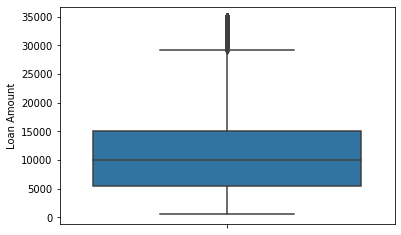

In [45]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

**Observation** : The loan amount varies from 0 to 35,000 having mean of 10,000

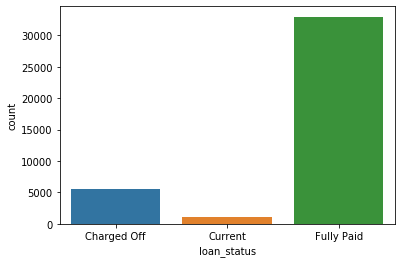

In [46]:
sns.countplot(x= df["loan_status"])
plt.show()

**Observations:** 
1. Most of the loans are Fully Paid. 
2. About 14% of loan are having status as defaulters.


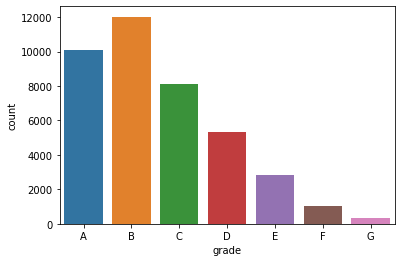

In [47]:
sns.countplot(x='grade', data=df)
plt.show()

**Observations:** Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

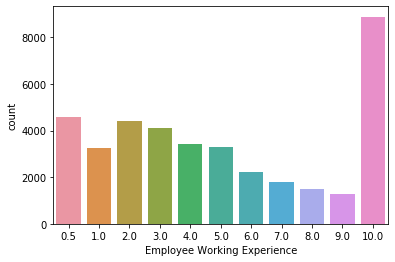

In [48]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

**Observations:** Majority of employees applying for the loan have more than 10 years of experience

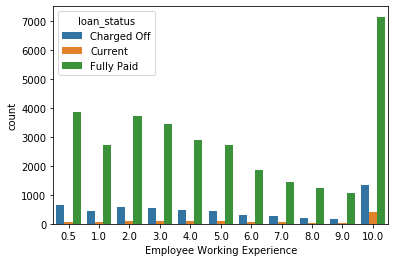

In [49]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()


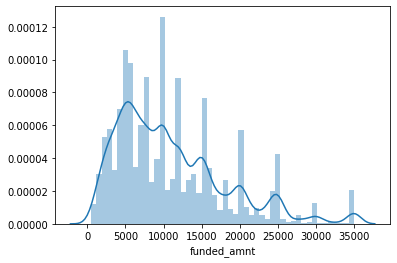

In [50]:
sns.distplot(df['funded_amnt'])
plt.show()


**Observations:** Most of the loan amount given is 5 lakhs

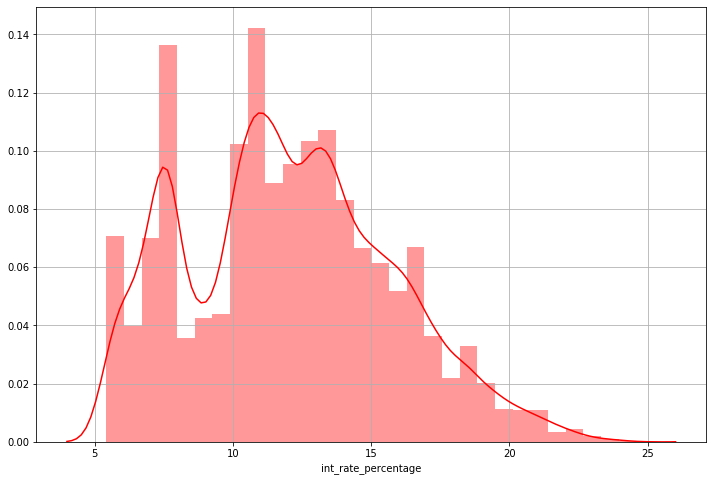

In [51]:
plt.figure(figsize=(12,8))
sns.distplot(df['int_rate_percentage'], bins=30, color="r").grid(True)
plt.show()

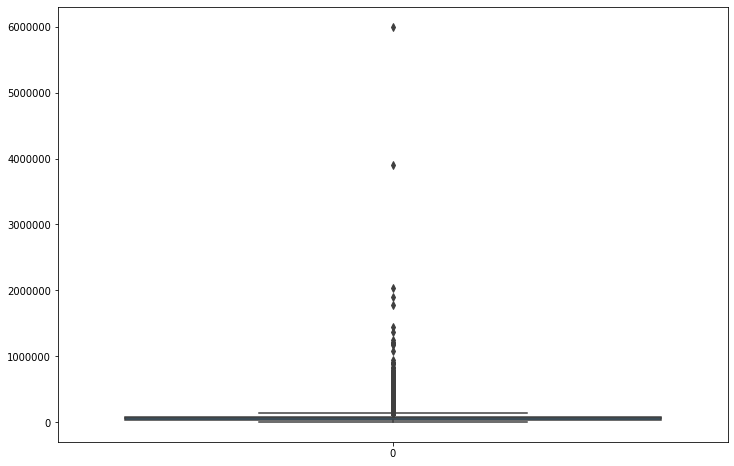

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df['annual_inc'])                    
#sns.distplot(df['annual_inc'], bins=5)
#plt.xlabel('Annual Income in Lakhs')
plt.show()

**Observations** There are two outliers having the income more than 3000000 (30 lakhs)

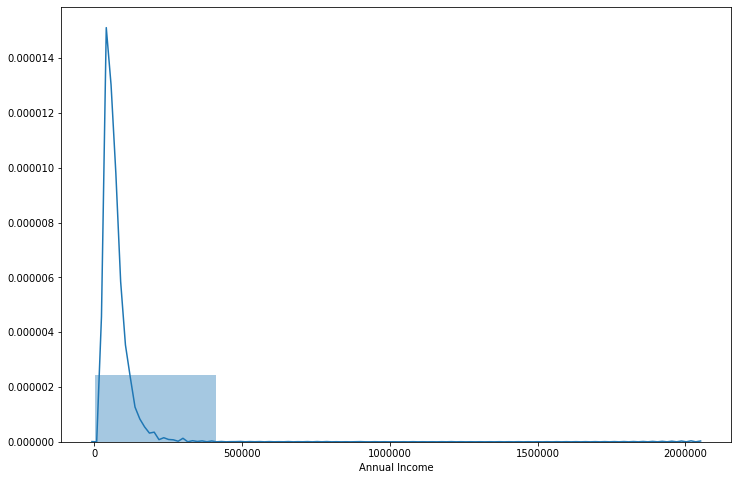

In [53]:
plt.figure(figsize=(12,8))                  
sns.distplot(df[df['annual_inc'] < 3000000]['annual_inc'], bins=5)
plt.xlabel('Annual Income')
plt.show()

**Observation** The annual income is less than 500000 (5 lakhs) with the exception of two outliers having more than 30 lakhs

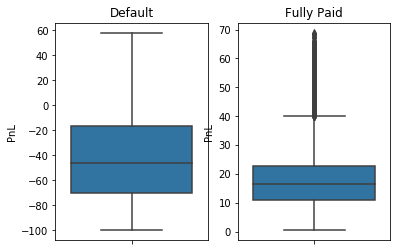

In [54]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

## Segmented Univariate Analysis

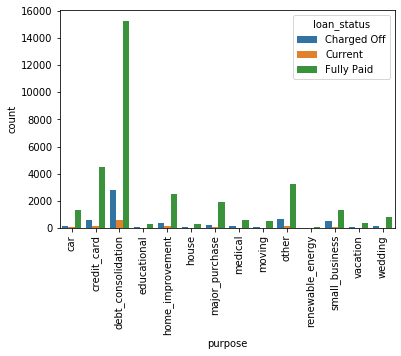

In [55]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

**Observations:** Majority of loan has been given for the debt consolidation purpose and has been fully paid.

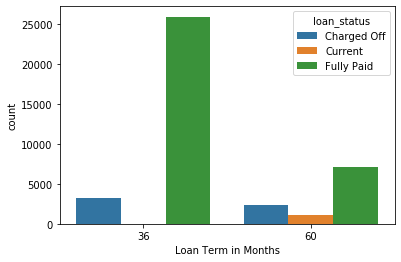

In [56]:
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

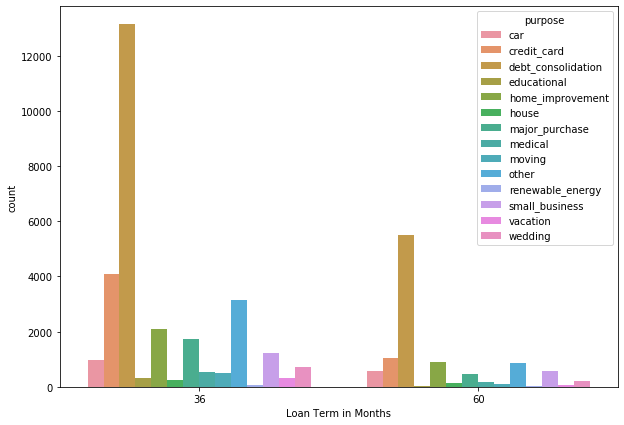

In [57]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()


### Create Dictionaries and map the values to the string_columns, categorical_columns in the dataset

In [58]:
categorical_columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies'],
      dtype='object')

In [59]:
for i in range(len(categorical_columns)):
    column = categorical_columns[i]
    dict_name = 'dict_'+column
    daf1 = pd.DataFrame(df[column].unique())
    di1= daf1.to_dict()
    dict_name  = dict([(value, key) for key, value in di1[0].items()]) 
    globals()[f"dict_{column}"]  = dict([(value, key) for key, value in di1[0].items()]) 
    df[column] = df[column].map(dict_name)
    df[column] = df[column].astype('float64')
    print('dict_'+column ,'=', dict_name)



dict_grade = {'B': 0, 'C': 1, 'A': 2, 'E': 3, 'F': 4, 'D': 5, 'G': 6}
dict_sub_grade = {'B2': 0, 'C4': 1, 'C5': 2, 'C1': 3, 'B5': 4, 'A4': 5, 'E1': 6, 'F2': 7, 'C3': 8, 'B1': 9, 'D1': 10, 'A1': 11, 'B3': 12, 'B4': 13, 'C2': 14, 'D2': 15, 'A3': 16, 'A5': 17, 'D5': 18, 'A2': 19, 'E4': 20, 'D3': 21, 'D4': 22, 'F3': 23, 'E3': 24, 'F4': 25, 'F1': 26, 'E5': 27, 'G4': 28, 'E2': 29, 'G3': 30, 'G2': 31, 'G1': 32, 'F5': 33, 'G5': 34}
dict_home_ownership = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3, 'NONE': 4}
dict_verification_status = {'Verified': 0, 'Source Verified': 1, 'Not Verified': 2}
dict_loan_status = {'Fully Paid': 0, 'Charged Off': 1, 'Current': 2}
dict_purpose = {'credit_card': 0, 'car': 1, 'small_business': 2, 'other': 3, 'wedding': 4, 'debt_consolidation': 5, 'home_improvement': 6, 'major_purchase': 7, 'medical': 8, 'moving': 9, 'vacation': 10, 'house': 11, 'renewable_energy': 12, 'educational': 13}
dict_addr_state = {'AZ': 0, 'GA': 1, 'IL': 2, 'CA': 3, 'OR': 4, 'NC': 5, 'TX':

In [60]:
dict_grade ## All the dictionaries are saved with dict_ and column name

{'B': 0, 'C': 1, 'A': 2, 'E': 3, 'F': 4, 'D': 5, 'G': 6}

In [61]:
df_corr = df.corr()
corr_Loan_stat = df.corrwith(df['loan_status'])
df_corr_Loan_stat = pd.DataFrame(data = corr_Loan_stat)
df_corr_Loan_stat.reset_index(level=0, inplace=True)
df_corr_Loan_stat.rename(columns ={'index':'attr',0:'attr_corr'},inplace=True)
df_corr_Loan_stat.sort_values(by='attr_corr',ascending=False)

,attr,attr_corr
9,loan_status,1.00
21,out_prncp,0.53
22,out_prncp_inv,0.53
32,term_months,0.31
33,int_rate_percentage,0.25
28,recoveries,0.24
26,total_rec_int,0.22
38,loan_inc_ratio,0.15
29,collection_recovery_fee,0.14
0,loan_amnt,0.13


In [62]:
df_corr.shape
#sns.heatmap(df_corr)

(40, 40)

In [63]:
df.shape

(39717, 53)

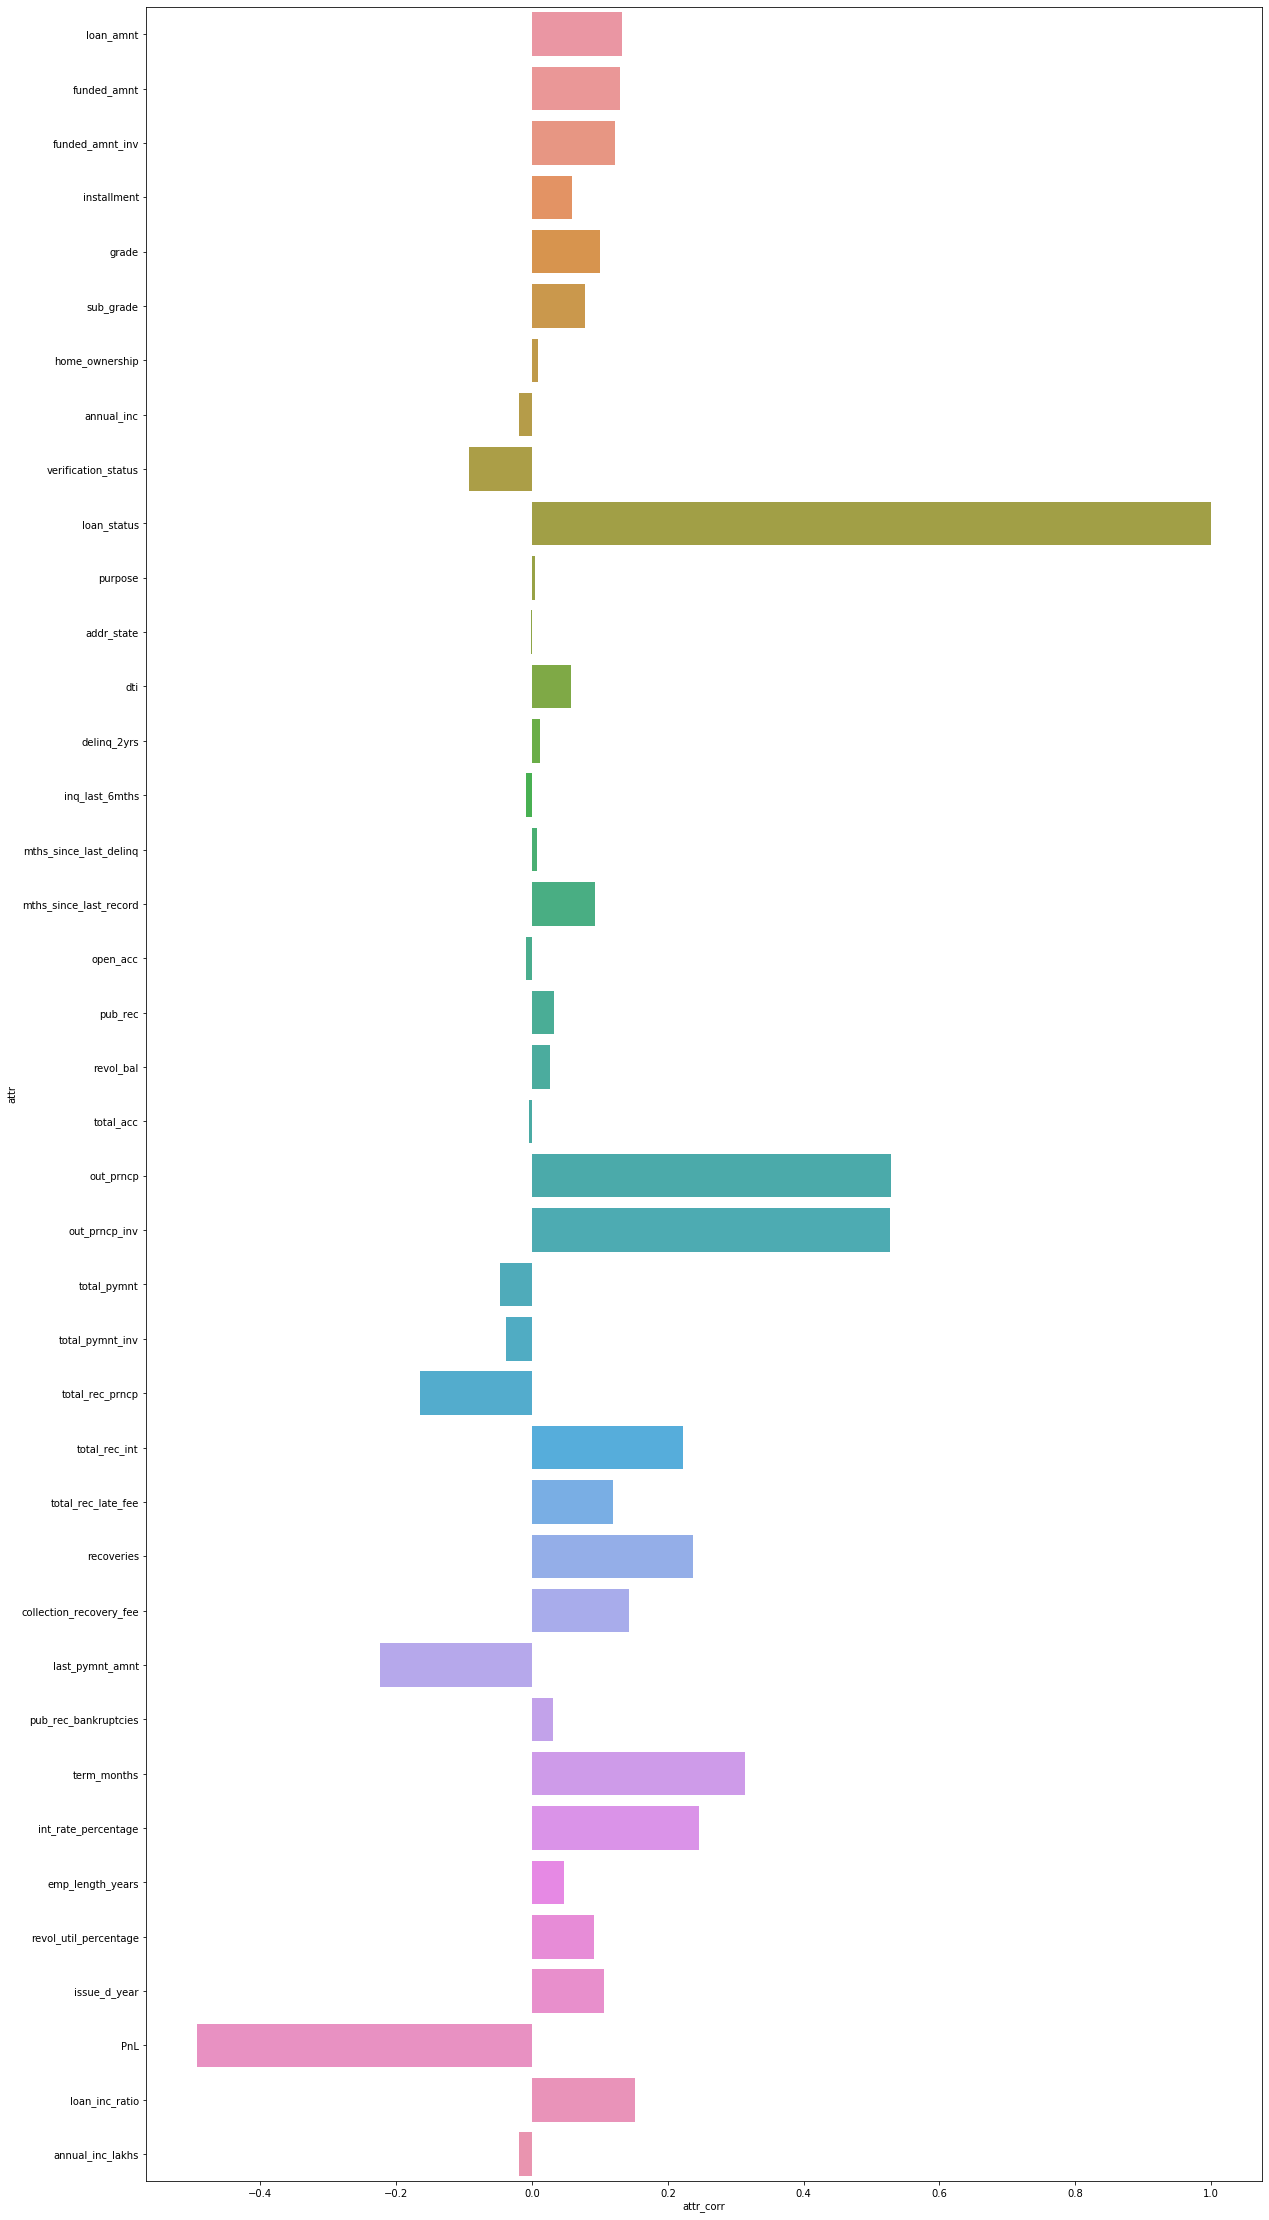

In [64]:
plt.figure(figsize=(20,40))
sns.barplot(y= 'attr',x= 'attr_corr',data=df_corr_Loan_stat)
plt.show()

**Loan Status Dictionary** {'Fully Paid': 0, 'Charged Off': 1, 'Current': 2}

In [65]:
dict_loan_status_1 = {v: k for k, v in dict_loan_status.items()}
df['loan_status'] = df['loan_status'].map(dict_loan_status_1)

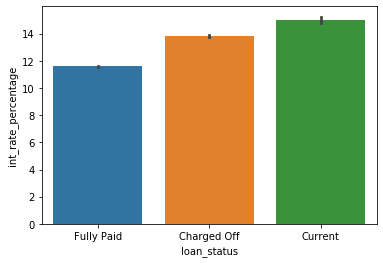

In [66]:
#df['loan_status']
sns.barplot(x='loan_status',y='int_rate_percentage',data=df)

**NEW Observations** Higher Interest Rates are usually Charged Off 

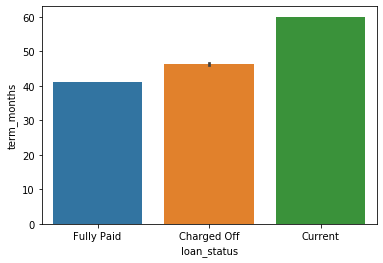

In [67]:
sns.barplot(x='loan_status',y='term_months',data=df)

**NEW Observations** Longer Term are usually Charged Off 

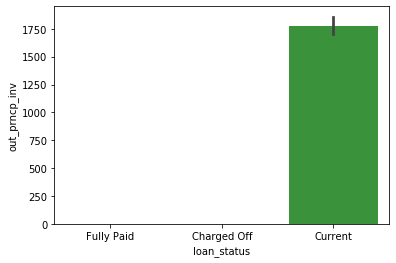

In [68]:
sns.barplot(x='loan_status',y='out_prncp_inv',data=df)

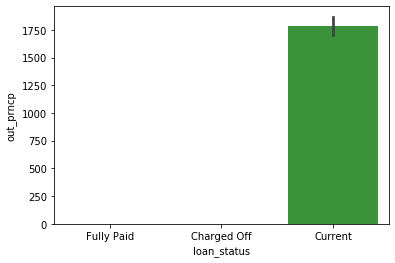

In [69]:
sns.barplot(x='loan_status',y='out_prncp',data=df)

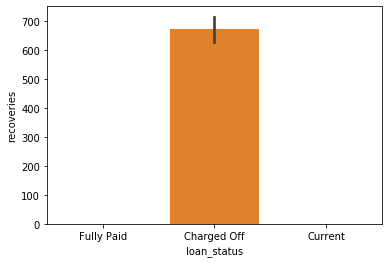

In [70]:
sns.barplot(x='loan_status',y='recoveries',data=df)

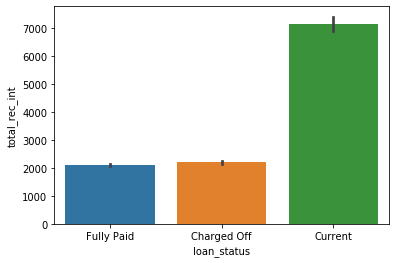

In [71]:
sns.barplot(x='loan_status',y='total_rec_int',data=df)



**NEW Observations** Interest Received till date is similar for Fully Paid and Charged Off Loans but higher for ongoing/current loans

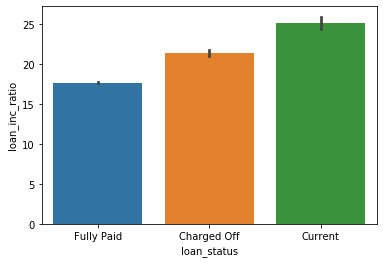

In [72]:

sns.barplot(x='loan_status',y='loan_inc_ratio',data=df)


In [73]:
df['loan_inc_ratio'].unique()## This is the Interest Income

array([20.83333333,  8.33333333, 19.58863859, ..., 36.528346  ,
       67.5       ,  7.16216216])

In [74]:
loan_columns_dropped_data['funded_amnt_label']=pd.qcut(loan_columns_dropped_data['funded_amnt'], q=[0, .2, .4, .6, .8, 1])
loan_columns_dropped_data['annual_inc_label']=pd.qcut(loan_columns_dropped_data['annual_inc'],  q=[0, .2, .4, .6, .8, 1])
print(loan_columns_dropped_data['funded_amnt_label'].unique())
print(loan_columns_dropped_data['annual_inc_label'].unique())

[(499.999, 5000.0], (7800.0, 11200.0], (5000.0, 7800.0], (11200.0, 16000.0], (16000.0, 35000.0]]
Categories (5, interval[float64]): [(499.999, 5000.0] < (5000.0, 7800.0] < (7800.0, 11200.0] < (11200.0, 16000.0] < (16000.0, 35000.0]]
[(3999.999, 37500.0], (37500.0, 50400.0], (65844.4, 90000.0], (90000.0, 6000000.0], (50400.0, 65844.4]]
Categories (5, interval[float64]): [(3999.999, 37500.0] < (37500.0, 50400.0] < (50400.0, 65844.4] < (65844.4, 90000.0] < (90000.0, 6000000.0]]


In [75]:
fund_lables = ['5000', '7800','11200', '16000', '35000']
annual_inc_lables = ['37500', '50400', '65844', '90000','6000000']
loan_columns_dropped_data['funded_amnt_label']=(pd.qcut(loan_columns_dropped_data['funded_amnt'], q=[0, .2, .4, .6, .8, 1],labels=fund_lables)).astype('int')
loan_columns_dropped_data['annual_inc_label']=(pd.qcut(loan_columns_dropped_data['annual_inc'],  q=[0, .2, .4, .6, .8, 1],labels=annual_inc_lables)).astype('int')
print(loan_columns_dropped_data['funded_amnt_label'].unique())
print(loan_columns_dropped_data['annual_inc_label'].unique())

[ 5000 11200  7800 16000 35000]
[  37500   50400   90000 6000000   65844]


In [76]:
dict_loan_status_1 = {v: k for k, v in dict_loan_status.items()}
dict_loan_status_1

{0: 'Fully Paid', 1: 'Charged Off', 2: 'Current'}

In [77]:
loan_columns_dropped_data['loan_status'] = loan_columns_dropped_data['loan_status'].map(dict_loan_status_1)


In [78]:
plt.figure(figsize=(15,15))
sns.barplot(y='funded_amnt_label',x='annual_inc_label',hue='loan_status',data=loan_columns_dropped_data)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1080x1080 with 0 Axes>

**NEW Observations**
(i) If Annual income is between 4k to 37.5k , Loan amount greater than approx 8k has higher chances of "Charged-Off"
(ii) If Annual income is between 37.5k to 50.4k , Loan amount greater than approx 12k has higher chances of "Charged-Off"
(iii) If Annual income is between 50.4k to 65.8k, Loan amount greater than approx 13k has higher chances of "Charged-Off"
(iv) If Annual income is between 65.8k to 90k, Loan amount greater than approx 16k has higher chances of "Charged-Off"
(v) If Annual income is greater than 90k , Loan amount greater than approx 20k has higher chances of "Charged-Off"

In [ ]:
dict_purpose_1 = dct = {v: k for k, v in dict_purpose.items()}
df['purpose'] = df['purpose'].map(dict_purpose_1)

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [ ]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

**NEW Observations** Loan Applicants have been increasing exponentially from year 2007 to 2011